In [1]:
Project = '/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Projects/Adipocyte'

from IPython.display import display
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches

plt.rcParams.update(plt.rcParamsDefault)

mpl.rcParams['font.sans-serif'] = "Arial"
mpl.rcParams['font.family'] = "sans-serif"

plt.rcParams['ps.useafm']=True
plt.rcParams['pdf.fonttype']=42

plt.rc('font', size=7)          # controls default text sizes
plt.rc('axes', titlesize=7)     # fontsize of the axes title
plt.rc('axes', labelsize=7)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=6)    # fontsize of the tick labels
plt.rc('ytick', labelsize=6)    # fontsize of the tick labels
plt.rc('legend', fontsize=6)    # legend fontsize
suptitlesize = 7

plt.rc('axes', axisbelow=True) #push axes to back
plt.rcParams['axes.linewidth'] = 0.5

In [3]:
P_GTF = pd.read_csv('/Users/daehwa/Library/CloudStorage/OneDrive-Personal/Junlab/Data_Library/GTF_parsed/v0.7.1/gencode.vM27.annotation.gtf/Processed_gtf.tsv', sep='\t')
P_GTF = pd.merge(pd.DataFrame({'Transcript_ID':['ENSMUST00000023024.8']}), P_GTF, on='Transcript_ID').T.to_dict()[0]

P_GTF

{'Transcript_ID': 'ENSMUST00000023024.8',
 'Gene_ID': 'ENSMUSG00000022389.16',
 'Gene_type': 'protein_coding',
 'Gene_name': 'Tef',
 'Strand': '+',
 'Seqname': 'chr15',
 'CCDS_tag': 'Yes',
 'Transcript_range': '81695615,81710899',
 'Exon_range': '81695615,81695921.81699145,81699462.81705400,81705620.81707667,81710899',
 'CDS_range': '81695771,81695921.81699145,81699462.81705400,81705620.81707667,81707879',
 'Start_codon_range': '81695771,81695773',
 'Stop_codon_range': '81707880,81707882',
 'Transcript_length': 4079,
 '5UTR_length': 156,
 'CDS_length': 906,
 '3UTR_length': 3017}

In [4]:
start_end = [81695550, 81711100]

depth_dict = {}
SPs = [f'D{day}{rep}' for day in ['0','4','8'] for rep in ['a','b','c']]
for SP in SPs:
    tmp = pd.read_csv(f'{Project}/Results/Tables/Gene_coverage/v20230725/Tef_{SP}_RPF_depth.tsv.gz', sep='\t', compression='gzip', names=['Chr','Pos','Depth'])

    depth_data = []
    tmp = tmp.set_index('Pos')['Depth'].to_dict()
    for i in range(start_end[0], start_end[1]+1, 1):
        depth_data.append(tmp.get(i, 0))

    depth_dict[SP] = depth_data

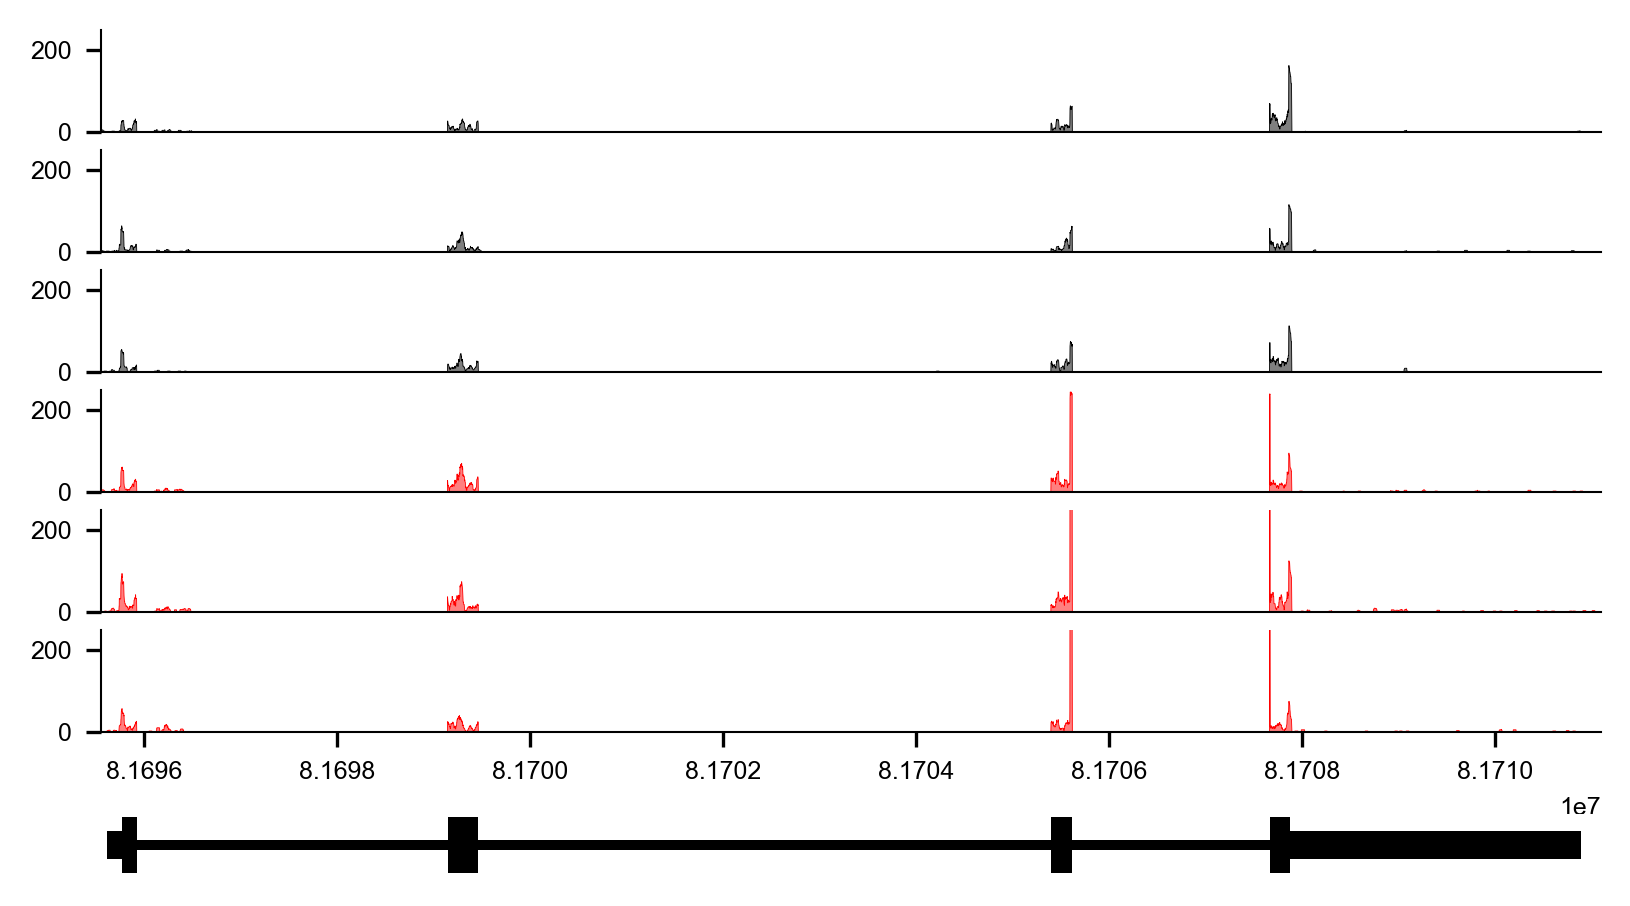

<Figure size 640x480 with 0 Axes>

In [5]:
xlim = [81695550, 81711100]

sF = 1 # Size factor
wgap = 0.1
hgap = 0.2
nrow, ncol = 8, 1

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w*5, fs_h*0.3 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios = [0.33]*6+[0.15,0.2],
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


#
row = 0
for rep in ['a','b','c']:
        ax = fig.add_subplot(grid[row,0])

        ax.plot(range(start_end[0], start_end[1]+1, 1),
                depth_dict[f'D0{rep}'],
                lw=0.2, c='k')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        depth_dict[f'D0{rep}'],
                        facecolor='k', alpha=0.5)

        ax.set_xlim(xlim)
        ax.set_ylim(0,250)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        row += 1

# tmp = [[81705350, 81705630], [81707657, 81707950]]
# rect = patches.Rectangle((tmp[0][0], 0), tmp[0][1]-tmp[0][0], 250, lw=0.5, ls='-', edgecolor='#505050', facecolor='none')
# ax.add_patch(rect)
# rect = patches.Rectangle((tmp[1][0], 0), tmp[1][1]-tmp[1][0], 250, lw=0.5, ls='-', edgecolor='#505050', facecolor='none')
# ax.add_patch(rect)


#
for rep in ['a','b','c']:
        ax = fig.add_subplot(grid[row,0])

        ax.plot(range(start_end[0], start_end[1]+1, 1),
                depth_dict[f'D8{rep}'],
                lw=0.2, c='r')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        depth_dict[f'D8{rep}'],
                        facecolor='r', alpha=0.5)

        ax.set_xlim(xlim)
        ax.set_ylim(0,250)
        if row!=5: ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        row += 1


#
ax = fig.add_subplot(grid[nrow-1,0])

# Transcript
ax.barh(0,
        int(P_GTF['Transcript_range'].split(',')[1]) - int(P_GTF['Transcript_range'].split(',')[0]),
        left = int(P_GTF['Transcript_range'].split(',')[0]),
        height=0.1,
        color='k')
# Exon
for pair in P_GTF['Exon_range'].split('.'):
        ax.barh(0,
                int(pair.split(',')[1]) - int(pair.split(',')[0]),
                left = int(pair.split(',')[0]),
                height=0.3,
                color='k')
# CDS
for pair in P_GTF['CDS_range'].split('.'):
        ax.barh(0,
                int(pair.split(',')[1]) - int(pair.split(',')[0]),
                left = int(pair.split(',')[0]),
                height=0.6,
                color='k')

ax.set_xlim(xlim)
ax.set_xticks([])
ax.set_yticks([])

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)


# plt.savefig('Tef_RPF_coverage_plot.pdf', bbox_inches='tight')
plt.show()
plt.clf()

In [7]:
avg_depth_dict = {}
for day in ['0','4','8']:
    avg_depth_dict[day] = (np.array(depth_dict[f'D{day}a']) + np.array(depth_dict[f'D{day}b']) + np.array(depth_dict[f'D{day}c']))/3

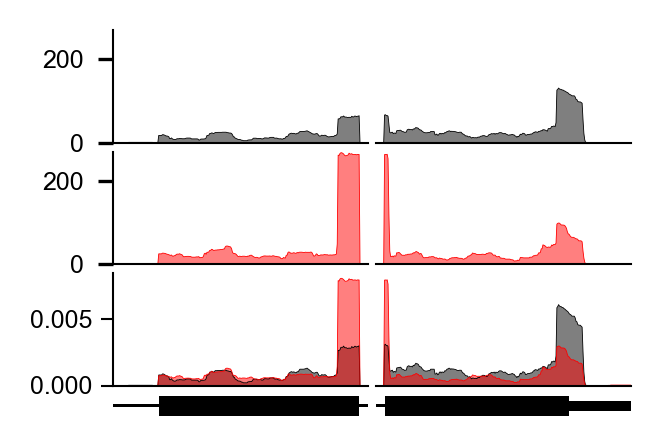

<Figure size 640x480 with 0 Axes>

In [8]:
# 81705400,81705620 81707667,81710899
xlim = [[81705350, 81705630], [81707657, 81707950]]

sF = 1 # Size factor
wgap = 0.03
hgap = 0.1
nrow, ncol = 4, 2

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w*0.85, fs_h*0.3 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios = [1]*3+[0.2],
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


for col in range(ncol):
        ax = fig.add_subplot(grid[0,col])

        ax.plot(range(start_end[0], start_end[1]+1, 1),
                avg_depth_dict['0'],
                lw=0.2, c='k')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        avg_depth_dict['0'],
                        facecolor='k', alpha=0.5)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,270)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        #-------------------------------------
        ax = fig.add_subplot(grid[1,col])

        ax.plot(range(start_end[0], start_end[1]+1, 1),
                avg_depth_dict['8'],
                lw=0.2, c='r')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        avg_depth_dict['8'],
                        facecolor='r', alpha=0.5)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,270)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        
        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        #-------------------------------------
        ax = fig.add_subplot(grid[2,col])

        tmp_depth = avg_depth_dict['0'] / sum(avg_depth_dict['0'])
        ax.plot(range(start_end[0], start_end[1]+1, 1),
                tmp_depth,
                lw=0.2, c='k')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        tmp_depth,
                        facecolor='k', alpha=0.5)

        tmp_depth = avg_depth_dict['8'] / sum(avg_depth_dict['8'])
        ax.plot(range(start_end[0], start_end[1]+1, 1),
                tmp_depth,
                lw=0.2, c='r')
        ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                        0,
                        tmp_depth,
                        facecolor='r', alpha=0.5)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,)
        ax.set_xticks([])
        ax.tick_params(width=0.5, length=3, pad=2)

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        
        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        ####-------------------------------------
        ax = fig.add_subplot(grid[nrow-1,col])

        # Transcript
        ax.barh(0,
                int(P_GTF['Transcript_range'].split(',')[1]) - int(P_GTF['Transcript_range'].split(',')[0]),
                left = int(P_GTF['Transcript_range'].split(',')[0]),
                height=0.1,
                color='k')
        # Exon
        for pair in P_GTF['Exon_range'].split('.'):
                ax.barh(0,
                        int(pair.split(',')[1]) - int(pair.split(',')[0]),
                        left = int(pair.split(',')[0]),
                        height=0.3,
                        color='k')
        # CDS
        for pair in P_GTF['CDS_range'].split('.'):
                ax.barh(0,
                        int(pair.split(',')[1]) - int(pair.split(',')[0]),
                        left = int(pair.split(',')[0]),
                        height=0.6,
                        color='k')

        ax.set_xlim(xlim[col])
        ax.set_xticks([])
        ax.set_yticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)


plt.savefig('Tef_RPF_coverage_plot_focus.pdf', bbox_inches='tight')
plt.show()
plt.clf()

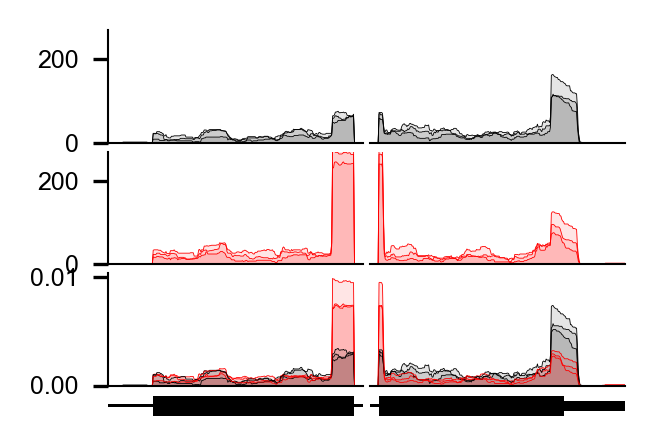

<Figure size 640x480 with 0 Axes>

In [9]:
# 81705400,81705620 81707667,81710899
xlim = [[81705350, 81705630], [81707657, 81707950]]

sF = 1 # Size factor
wgap = 0.03
hgap = 0.1
nrow, ncol = 4, 2

fs_w = ncol*sF + (ncol-1)*wgap*sF
fs_h = nrow*sF + (nrow-1)*hgap*sF

#
fig = plt.figure(figsize=( fs_w*0.85, fs_h*0.3 ), dpi=300)
grid = plt.GridSpec(nrow, ncol,
                    height_ratios = [1]*3+[0.2],
                    left=0, right=1, bottom=0, top=1,
                    wspace=wgap, hspace=hgap)


for col in range(ncol):
        ax = fig.add_subplot(grid[0,col])

        for rep in ['a','b','c']:
            ax.plot(range(start_end[0], start_end[1]+1, 1),
                    depth_dict[f'D0{rep}'],
                    lw=0.2, c='k')
            ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                            0,
                            depth_dict[f'D0{rep}'],
                            facecolor='k', alpha=0.1)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,270)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)

        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        #
        ax = fig.add_subplot(grid[1,col])

        for rep in ['a','b','c']:
            ax.plot(range(start_end[0], start_end[1]+1, 1),
                    depth_dict[f'D8{rep}'],
                    lw=0.2, c='r')
            ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                            0,
                            depth_dict[f'D8{rep}'],
                            facecolor='r', alpha=0.1)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,270)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        
        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        #
        ax = fig.add_subplot(grid[2,col])

        for rep in ['a','b','c']:
            tmp_depth = np.array(depth_dict[f'D0{rep}']) / sum(np.array(depth_dict[f'D0{rep}']))
            ax.plot(range(start_end[0], start_end[1]+1, 1),
                    tmp_depth,
                    lw=0.2, c='k')
            ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                            0,
                            tmp_depth,
                            facecolor='k', alpha=0.1)

            tmp_depth = np.array(depth_dict[f'D8{rep}']) / sum(np.array(depth_dict[f'D8{rep}']))
            ax.plot(range(start_end[0], start_end[1]+1, 1),
                    tmp_depth,
                    lw=0.2, c='r')
            ax.fill_between(range(start_end[0], start_end[1]+1, 1),
                            0,
                            tmp_depth,
                            facecolor='r', alpha=0.1)

        ax.set_xlim(xlim[col])
        ax.set_ylim(0,)
        ax.set_xticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        # ax.spines['bottom'].set_visible(False)
        # ax.spines['left'].set_visible(False)
        
        if col==1:
                ax.spines['left'].set_visible(False)
                ax.set_yticks([])


        ####
        ax = fig.add_subplot(grid[nrow-1,col])

        # Transcript
        ax.barh(0,
                int(P_GTF['Transcript_range'].split(',')[1]) - int(P_GTF['Transcript_range'].split(',')[0]),
                left = int(P_GTF['Transcript_range'].split(',')[0]),
                height=0.1,
                color='k')
        # Exon
        for pair in P_GTF['Exon_range'].split('.'):
                ax.barh(0,
                        int(pair.split(',')[1]) - int(pair.split(',')[0]),
                        left = int(pair.split(',')[0]),
                        height=0.3,
                        color='k')
        # CDS
        for pair in P_GTF['CDS_range'].split('.'):
                ax.barh(0,
                        int(pair.split(',')[1]) - int(pair.split(',')[0]),
                        left = int(pair.split(',')[0]),
                        height=0.6,
                        color='k')

        ax.set_xlim(xlim[col])
        ax.set_xticks([])
        ax.set_yticks([])

        ax.spines['top'].set_visible(False)
        ax.spines['right'].set_visible(False)
        ax.spines['bottom'].set_visible(False)
        ax.spines['left'].set_visible(False)


# plt.savefig('Tef_RPF_coverage_plot_focus2.pdf', bbox_inches='tight')
plt.show()
plt.clf()